# Setup

bathymetry: https://www.fatiando.org/harmonica/dev/sample_data/earth_topography.html

In [1]:
# add in the sla and chl observation lines 

# import your standard packages
%run pkgs.py
%run pars.py

# import your local functions
sys.path.insert(1, '../')
from local_functions import *

# make sure the figures plot inline rather than at the end
%matplotlib inline

Default libraries loaded.


# Paths and Parameters

In [2]:
figpath = '../figures/'

# Get Data

In [3]:
ds_WOD = xr.open_dataset('../data/wod_coastal_processed.nc')
ds_WOD

<xarray.Dataset>
Dimensions:                (pres: 57, time_eAS: 23134, time_eBoB: 20710, time_wAS: 31230, time_wBoB: 2847)
Coordinates:
  * time_wAS               (time_wAS) datetime64[ns] 1948-06-12 ... 2020-05-23
  * time_eAS               (time_eAS) datetime64[ns] 1948-03-14 ... 2020-05-31
  * time_wBoB              (time_wBoB) datetime64[ns] 1951-04-20 ... 2020-05-28
  * time_eBoB              (time_eBoB) datetime64[ns] 1948-06-29 ... 2020-05-29
  * pres                   (pres) int64 0 5 10 15 20 ... 1350 1400 1450 1500
Data variables:
    lat_wAS                (time_wAS) float32 ...
    lon_wAS                (time_wAS) float32 ...
    mon_wAS                (time_wAS) int64 ...
    seas_wAS               (time_wAS) int64 ...
    lat_eAS                (time_eAS) float32 ...
    lon_eAS                (time_eAS) float32 ...
    mon_eAS                (time_eAS) int64 ...
    seas_eAS               (time_eAS) int64 ...
    lat_wBoB               (time_wBoB) float32 ...
    lon_w

In [4]:
ds_WOD18 = xr.open_dataset('../data/wod18_coastal_processed.nc')
# ds_WOD18

In [5]:
ds_WOA = xr.open_dataset('../data/woa_coastal_processed.nc')
# ds_WOA

In [6]:
# load coastlines
ds_CL= xr.open_dataset('../data/sla_processed.nc')
# ds_CL

In [7]:
ds_HE = xr.open_dataset('../data/breitburg_processed.nc')
ds_HE

<xarray.Dataset>
Dimensions:  (decade: 21)
Coordinates:
  * decade   (decade) float64 1.98e+03 2e+03 2e+03 ... 2e+03 1.98e+03 1.99e+03
Data variables:
    etype    (decade) int64 ...
    lat      (decade) float64 ...
    lon      (decade) float64 ...

# Number of Profiles per year

In [8]:
# # merge all data
data = np.concatenate((ds_WOD.doxy_wAS_50_200,ds_WOD.doxy_eAS_50_200,
                       ds_WOD.doxy_wBoB_50_200,ds_WOD.doxy_eBoB_50_200),0)
tdata = np.concatenate((ds_WOD.time_wAS,ds_WOD.time_eAS,
                       ds_WOD.time_wBoB,ds_WOD.time_eBoB),0)

data = xr.DataArray(data,dims = ['time'],coords =[tdata])

years = np.arange(np.min(data.time.dt.year),np.max(data.time.dt.year)+1)

no_doxy = np.full((len(years)),0)
for yy,year in enumerate(years):
    ind = data.time.dt.year == year
    
    tmp_data = data[ind]
    no_doxy[yy] = len(tmp_data[~np.isnan(tmp_data)])
years.shape, no_doxy.shape   

((73,), (73,))

In [9]:
# np.nansum(no_temp[years <1940]),np.nansum(no_doxy[years <1949])

In [10]:
# spIODyears = [1961, 1972, 1994, 1997, 2006, 2019]
# for year in spIODyears:
#     print('temp ',year, ': ', no_temp[years == year],
#          'doxy ',year, ': ', no_doxy[years == year])
    

In [11]:
# # merge all data
data = np.concatenate((ds_WOD.temp_wAS_50_200,ds_WOD.temp_eAS_50_200,
                       ds_WOD.temp_wBoB_50_200,ds_WOD.temp_eBoB_50_200),0)
tdata = np.concatenate((ds_WOD.time_wAS,ds_WOD.time_eAS,
                       ds_WOD.time_wBoB,ds_WOD.time_eBoB),0)

data = xr.DataArray(data,dims = ['time'],coords =[tdata])

years = np.arange(np.min(data.time.dt.year),np.max(data.time.dt.year)+1)
years

no_temp = np.full((len(years)),0)
for yy,year in enumerate(years):
    ind = data.time.dt.year == year
    
    tmp_data = data[ind]
    no_temp[yy] = len(tmp_data[~np.isnan(tmp_data)])
    

In [12]:
np.nansum(no_temp), np.nansum(no_doxy)

(66239, 3517)

# Domain Plot


Length Oxygen wAS:  526
Min Time wAS:  1960-11-04T00:00:00.000000000
Max Time wAS:  2013-07-05T00:00:00.000000000
Length Oxygen eAS:  1774
Min Time eAS:  1948-03-14T00:00:00.000000000
Max Time eAS:  2020-05-24T00:00:00.000000000
Length Oxygen wBoB:  258
Min Time wBoB:  1961-01-30T00:00:00.000000000
Max Time wBoB:  2018-07-24T00:00:00.000000000
Length Oxygen eBoB:  959
Min Time eBoB:  1957-05-13T00:00:00.000000000
Max Time eBoB:  2018-07-10T00:00:00.000000000


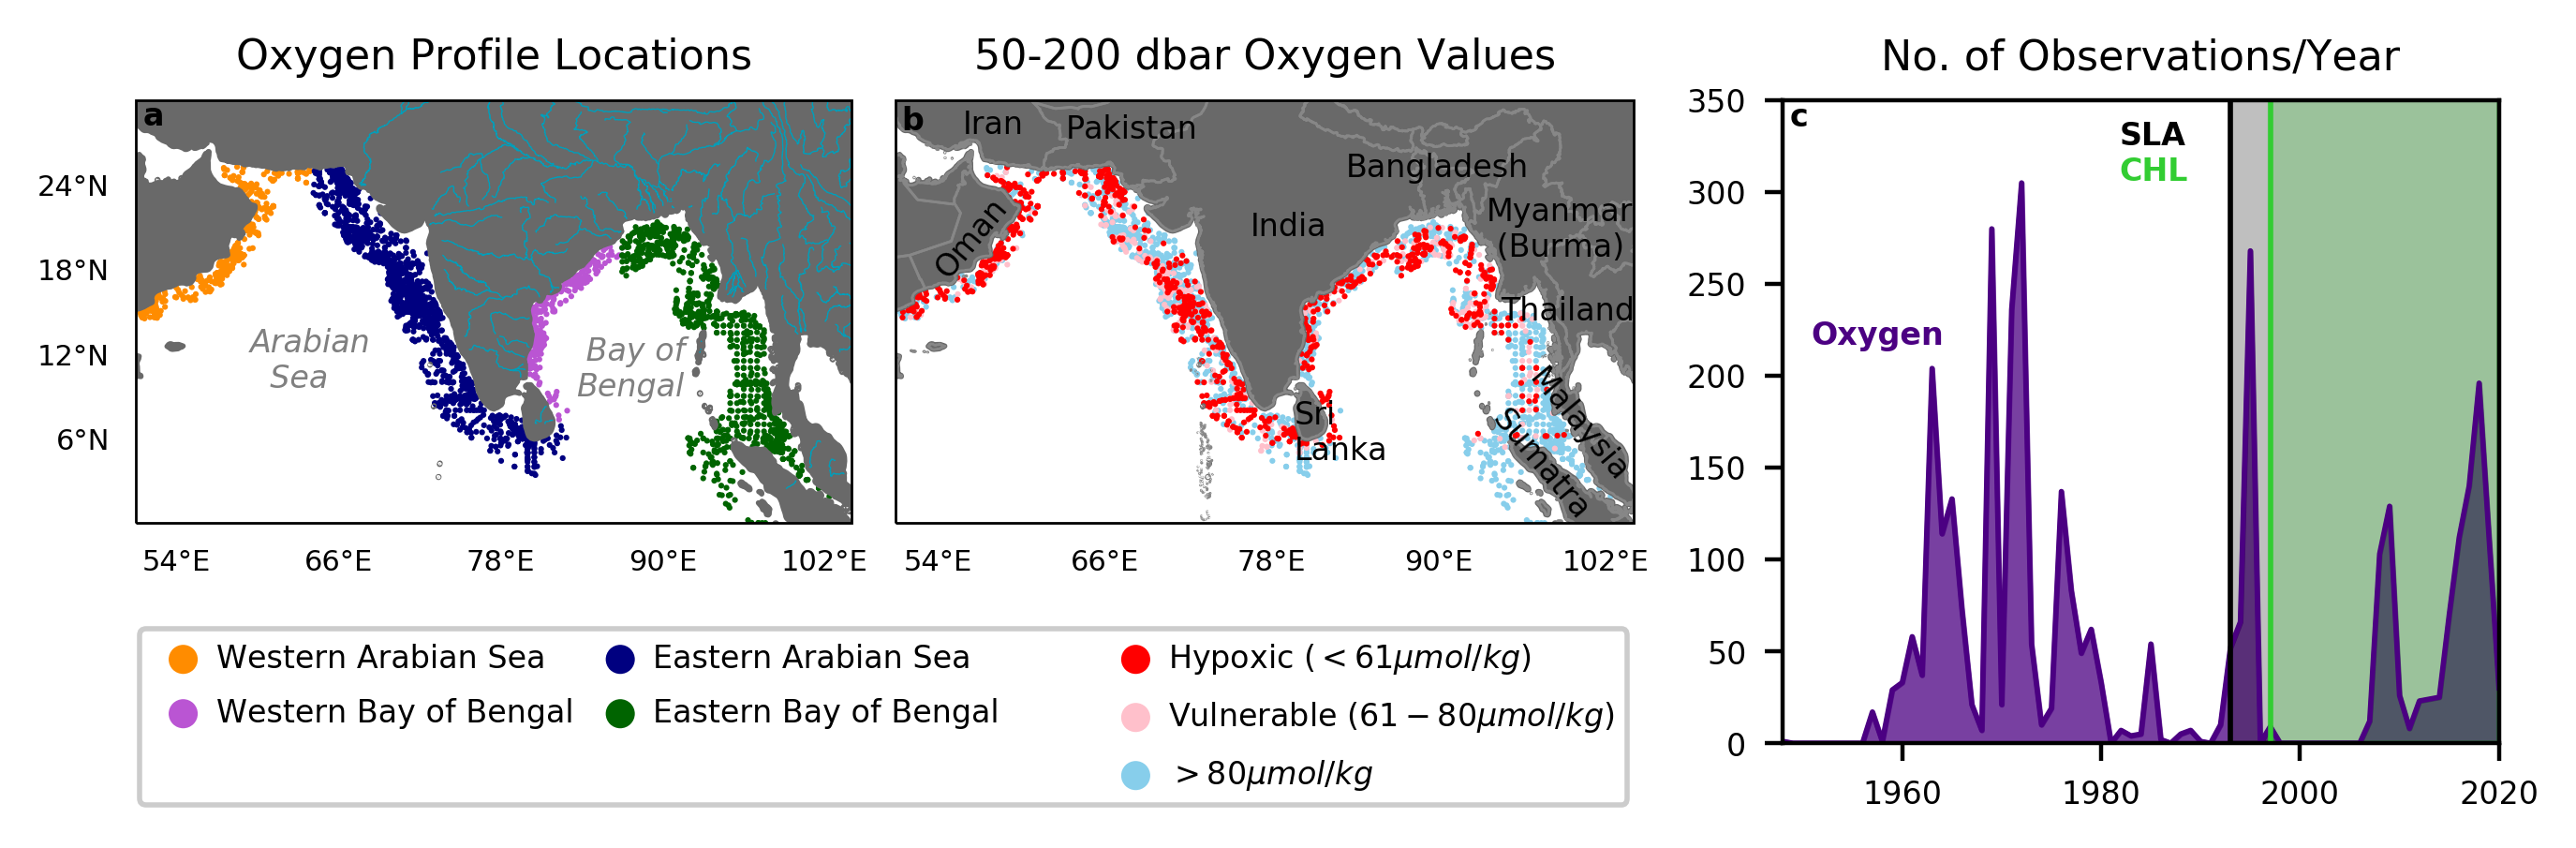

In [13]:
# # Plotting Full Indian Ocean

params = {'legend.fontsize': 6,
         'axes.labelsize': 6,
         'axes.titlesize': 8,
         'xtick.labelsize':6,
         'ytick.labelsize':6}

pylab.rcParams.update(params)
cmap = cmocean.cm.thermal_r

# limits 
cbounds = [51,104,0,30]
cmin = 20
cmax = 160
sz = 5
# clrs = ['navy','limegreen','deeppink','purple']
clrs = ['darkorange','navy','mediumorchid','darkgreen']
hyp_clr = '#FEE12B'
sla_clr = '#FEE12B'
lfz = 6
fig = plt.figure(figsize=(17.8 / 2.54,2.35),dpi=400)

#############################################################
#----------------- regions ---------------------#
#############################################################
ax = fig.add_subplot(131,projection= ccrs.PlateCarree())
plt.subplots_adjust(wspace = 0.15, bottom = 0.4, left = 0.05, right = 0.95)
# add_bathy(ax,cbounds)

# wAS
ind = ~np.isnan(ds_WOD.doxy_wAS_50_200)
p = ax.scatter(ds_WOD.lon_wAS[ind],ds_WOD.lat_wAS[ind],s=sz,marker = '.',c=clrs[0],cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())
# eAS
ind = ~np.isnan(ds_WOD.doxy_eAS_50_200)
p = ax.scatter(ds_WOD.lon_eAS[ind],ds_WOD.lat_eAS[ind],s=sz,marker = '.',c=clrs[1],cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())
# wBoB
ind = ~np.isnan(ds_WOD.doxy_wBoB_50_200)
p = ax.scatter(ds_WOD.lon_wBoB[ind],ds_WOD.lat_wBoB[ind],s=sz,marker = '.',c=clrs[2],cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())
# eBoB
ind = ~np.isnan(ds_WOD.doxy_eBoB_50_200)
p = ax.scatter(ds_WOD.lon_eBoB[ind],ds_WOD.lat_eBoB[ind],s=sz,marker = '.',c=clrs[3],cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())
# land
g = add_land(ax, bounds = cbounds,countries = False, rivers = True, rcolor = '#009fbb')
# g.xlocator = mticker.FixedLocator(np.arange(60,110,10))
g.xlabel_style = {'size': 5.5}
g.ylabel_style = {'size': 5.5}
g.xlocator = mticker.FixedLocator([54,66,78,90,102])
add_letter(ax, 'a', x = 0.01,y=0.94, fontsize = lfz, color = 'k')
# add_single_bathy_cline(ax,200,linewidth = 0.5, color = 'dimgray')

ax.set_title('Oxygen Profile Locations')

# Seas
add_text(ax, ' Bay of \nBengal', x = 0.615,y=0.3, fontsize = 6, color = 'gray', style='italic')
add_text(ax, 'Arabian\n  Sea', x = 0.16,y=0.32, fontsize = 6, color = 'gray', style='italic')

# ####### Hypoxia ##############################################

# hsz = 30
# halpha = 1

# ind = ds_HE.etype == 1
# ax.scatter(ds_HE.lon[ind],ds_HE.lat[ind],s=hsz,marker = '*',c=hyp_clr,alpha = halpha,
#                        edgecolor = 'k',transform=ccrs.PlateCarree(), zorder = 4,linewidth=0.5)

# newlat = [25.6,17.69,17.69,13,10,18.9,17,15.6,14.1,13,11.5,10,8,11,12,13]
# newlon = [52.4,57.08,57.08,74.5,76,72.6,73,73.4,74,74.5,75.2,76,77,79.5,79.8,80]

# ax.scatter(newlon,newlat,s=hsz,marker = '*',c='w',alpha = halpha,
#                        edgecolor = 'k',transform=ccrs.PlateCarree(), zorder = 4,linewidth=0.5)

#############################################################
#----------------- Oxygen ---------------------#
#############################################################
ax = fig.add_subplot(132,projection= ccrs.PlateCarree())
box = ax.get_position()
box.x0 = box.x0 - 0.08
box.x1 = box.x1 + 0.04
ax.set_position(box)

# add_bathy(ax,cbounds)

# wAS
ind = ~np.isnan(ds_WOD.doxy_wAS_50_200)
doxy = ds_WOD.doxy_wAS_50_200[ind]
lon = ds_WOD.lon_wAS[ind]
lat = ds_WOD.lat_wAS[ind]

print('Length Oxygen wAS: ', len(doxy))
print('Min Time wAS: ', np.array(np.min(ds_WOD.time_wAS[ind])))
print('Max Time wAS: ', np.array(np.max(ds_WOD.time_wAS[ind])))

ind = doxy>=80
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c='skyblue',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())

ind = (doxy>=61) & (doxy<80)
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c='pink',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())


ind = doxy<61
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c='r',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())



# eAS
ind = ~np.isnan(ds_WOD.doxy_eAS_50_200)
doxy = ds_WOD.doxy_eAS_50_200[ind]
lon = ds_WOD.lon_eAS[ind]
lat = ds_WOD.lat_eAS[ind]

print('Length Oxygen eAS: ', len(doxy))
print('Min Time eAS: ', np.array(np.min(ds_WOD.time_eAS[ind])))
print('Max Time eAS: ', np.array(np.max(ds_WOD.time_eAS[ind])))

ind = doxy>=80
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c='skyblue',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())

ind = (doxy>=61) & (doxy<80)
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c='pink',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())


ind = doxy<61
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c='r',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())


# wBoB
ind = ~np.isnan(ds_WOD.doxy_wBoB_50_200)
doxy = ds_WOD.doxy_wBoB_50_200[ind]
lon = ds_WOD.lon_wBoB[ind]
lat = ds_WOD.lat_wBoB[ind]

print('Length Oxygen wBoB: ', len(doxy))
print('Min Time wBoB: ', np.array(np.min(ds_WOD.time_wBoB[ind])))
print('Max Time wBoB: ', np.array(np.max(ds_WOD.time_wBoB[ind])))

ind = doxy>=80
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c='skyblue',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())

ind = (doxy>=61) & (doxy<80)
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c='pink',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())


ind = doxy<61
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c='r',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())


# eBoB
ind = ~np.isnan(ds_WOD.doxy_eBoB_50_200)
doxy = ds_WOD.doxy_eBoB_50_200[ind]
lon = ds_WOD.lon_eBoB[ind]
lat = ds_WOD.lat_eBoB[ind]

print('Length Oxygen eBoB: ', len(doxy))
print('Min Time eBoB: ', np.array(np.min(ds_WOD.time_eBoB[ind])))
print('Max Time eBoB: ', np.array(np.max(ds_WOD.time_eBoB[ind])))

ind = doxy>=80
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c='skyblue',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())

ind = (doxy>=61) & (doxy<80)
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c='pink',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())


ind = doxy<61
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c='r',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())




# land
g = add_land(ax, bounds = cbounds,countries = True, rivers = False)
g.ylabels_left = False
# g.ylabels_right = True
g.xlocator = mticker.FixedLocator([54,66,78,90,102])
g.xlabel_style = {'size': 5.5}
g.ylabel_style = {'size': 5.5}
add_letter(ax, 'b', x = 0.007,y=0.93, fontsize = lfz, color = 'k')


ax.set_title('50-200 dbar Oxygen Values')

# countries
clr = '#481F01'
clr = 'k'
add_text(ax, 'India', x = 0.48,y=0.68, fontsize = 6, color = clr)
add_text(ax, 'Bangladesh', x = 0.61,y=0.82, fontsize = 6, color = clr)
add_text(ax, 'Pakistan', x = 0.23,y=0.91, fontsize = 6, color = clr)
add_text(ax, 'Iran', x = 0.09,y=0.92, fontsize = 6, color = clr)
add_text(ax, 'Oman', x = 0.045,y=0.58, fontsize = 6, color = clr, rotation = 50)
add_text(ax, 'Myanmar\n (Burma)', x = 0.8,y=0.63, fontsize = 6, color = clr, rotation = 0)
add_text(ax, 'Thailand', x = 0.82,y=0.48, fontsize = 6, color = clr, rotation = 0)
add_text(ax, 'Malaysia', x = 0.85,y=0.1, fontsize = 6, color = clr, rotation = -50)
add_text(ax, 'Sumatra', x = 0.8,y=0.01, fontsize = 6, color = clr, rotation = -50)
add_text(ax, 'Sri\nLanka', x = 0.54,y=0.15, fontsize = 6, color = clr)


#############################################################
#----------------- Obs over time ---------------------#
#############################################################
lnclrs = ['indigo','k','limegreen']
ax = fig.add_subplot(133)
box = ax.get_position()
box.y0 = box.y0 - 0.25
ax.set_position(box)

ax.plot(years,no_doxy, color = lnclrs[0], linewidth = 1)
ax.fill_between(x = np.array(years),y1 = no_doxy, color = lnclrs[0], alpha=0.75)
ax.axvline(x=1993,color = lnclrs[1], linewidth = 1)
plt.fill_betweenx(y = np.arange(0,3100), x1 = 1993, x2 = 2020,
                  color = lnclrs[1],alpha=0.25)
ax.axvline(x=1997,color = lnclrs[2], linewidth = 1)
plt.fill_betweenx(y = np.arange(0,3100), x1 = 1997, x2 = 2020,
                  color = lnclrs[2],alpha=0.25)
ax.set_xlim([1948,2020])
ax.set_ylim([0,350])
add_letter(ax, 'c', x = 0.01,y=0.96, fontsize = lfz, color = 'k')

ax.set_title('No. of Observations/Year')

####### Legend ##############################################
add_text(ax, 'Oxygen', x = 0.04,y=0.62, fontsize = lfz, color = lnclrs[0], weight = 'bold')
add_text(ax, 'SLA', x = 0.47,y=0.93, fontsize = lfz, color = lnclrs[1], weight = 'bold')
add_text(ax, 'CHL', x = 0.47,y=0.875, fontsize = lfz, color = lnclrs[2], weight = 'bold')


####### Legend ##############################################
ax.scatter(np.nan,np.nan,s=sz,marker = '.',c=clrs[0],cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none', label = 'Western Arabian Sea')

ax.scatter(np.nan,np.nan,s=sz,marker = '.',c=clrs[2],cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none', label = 'Western Bay of Bengal')

ax.scatter(np.nan,np.nan,s=sz,marker = '.',c='none',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none', label = ' ')

# ax.scatter(np.nan,np.nan,s=1.75,marker = '*',c='k',
#                        edgecolor = 'k', label = 'Reported Cases of Hypoxia',linewidth=0.5)

ax.scatter(np.nan,np.nan,s=sz,marker = '.',c=clrs[1],cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none', label = 'Eastern Arabian Sea')

ax.scatter(np.nan,np.nan,s=sz,marker = '.',c=clrs[3],cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none', label = 'Eastern Bay of Bengal')

ax.scatter(np.nan,np.nan,s=sz,marker = '.',c='none',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none', label = ' ')

ax.scatter(np.nan,np.nan,s=sz,marker = '.',c='none',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none', label = ' ')

ax.scatter(np.nan,np.nan,s=sz,marker = '.',c='none',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none', label = ' ')

ax.scatter(np.nan,np.nan,s=sz,marker = '.',c='none',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none', label = ' ')

ax.scatter(np.nan,np.nan,s=sz,marker = '.',c='r',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none', label = 'Hypoxic ($<61 \mu mol/kg$)')


ax.scatter(np.nan,np.nan,s=sz,marker = '.',c='pink',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none', label = 'Vulnerable ($61-80 \mu mol/kg$)')

ax.scatter(np.nan,np.nan,s=sz,marker = '.',c='skyblue',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none', label = '$>80 \mu mol/kg$')




l = ax.legend(loc='lower center', bbox_to_anchor=(-1.256, -.12),
              markerscale = 5,ncol = 4, columnspacing = 0.5,
              facecolor = 'w',framealpha=1,handletextpad=0.05, 
              labelspacing = 0.75);

plt.savefig(figpath + 'domain.pdf', format='pdf', dpi = 400)

In [14]:
ax.plot(years,no_doxy, color = lnclrs[0], linewidth = 1)
ax.set_xlim([1948,2020])
ax.set_ylim([0,350])

(0, 350)

In [15]:
years.shape,no_doxy.shape

((73,), (73,))

Length Oxygen wAS:  526
Min Time wAS:  1960-11-04T00:00:00.000000000
Max Time wAS:  2013-07-05T00:00:00.000000000
Length Oxygen eAS:  1774
Min Time eAS:  1948-03-14T00:00:00.000000000
Max Time eAS:  2020-05-24T00:00:00.000000000
Length Oxygen wBoB:  258
Min Time wBoB:  1961-01-30T00:00:00.000000000
Max Time wBoB:  2018-07-24T00:00:00.000000000
Length Oxygen eBoB:  959
Min Time eBoB:  1957-05-13T00:00:00.000000000
Max Time eBoB:  2018-07-10T00:00:00.000000000


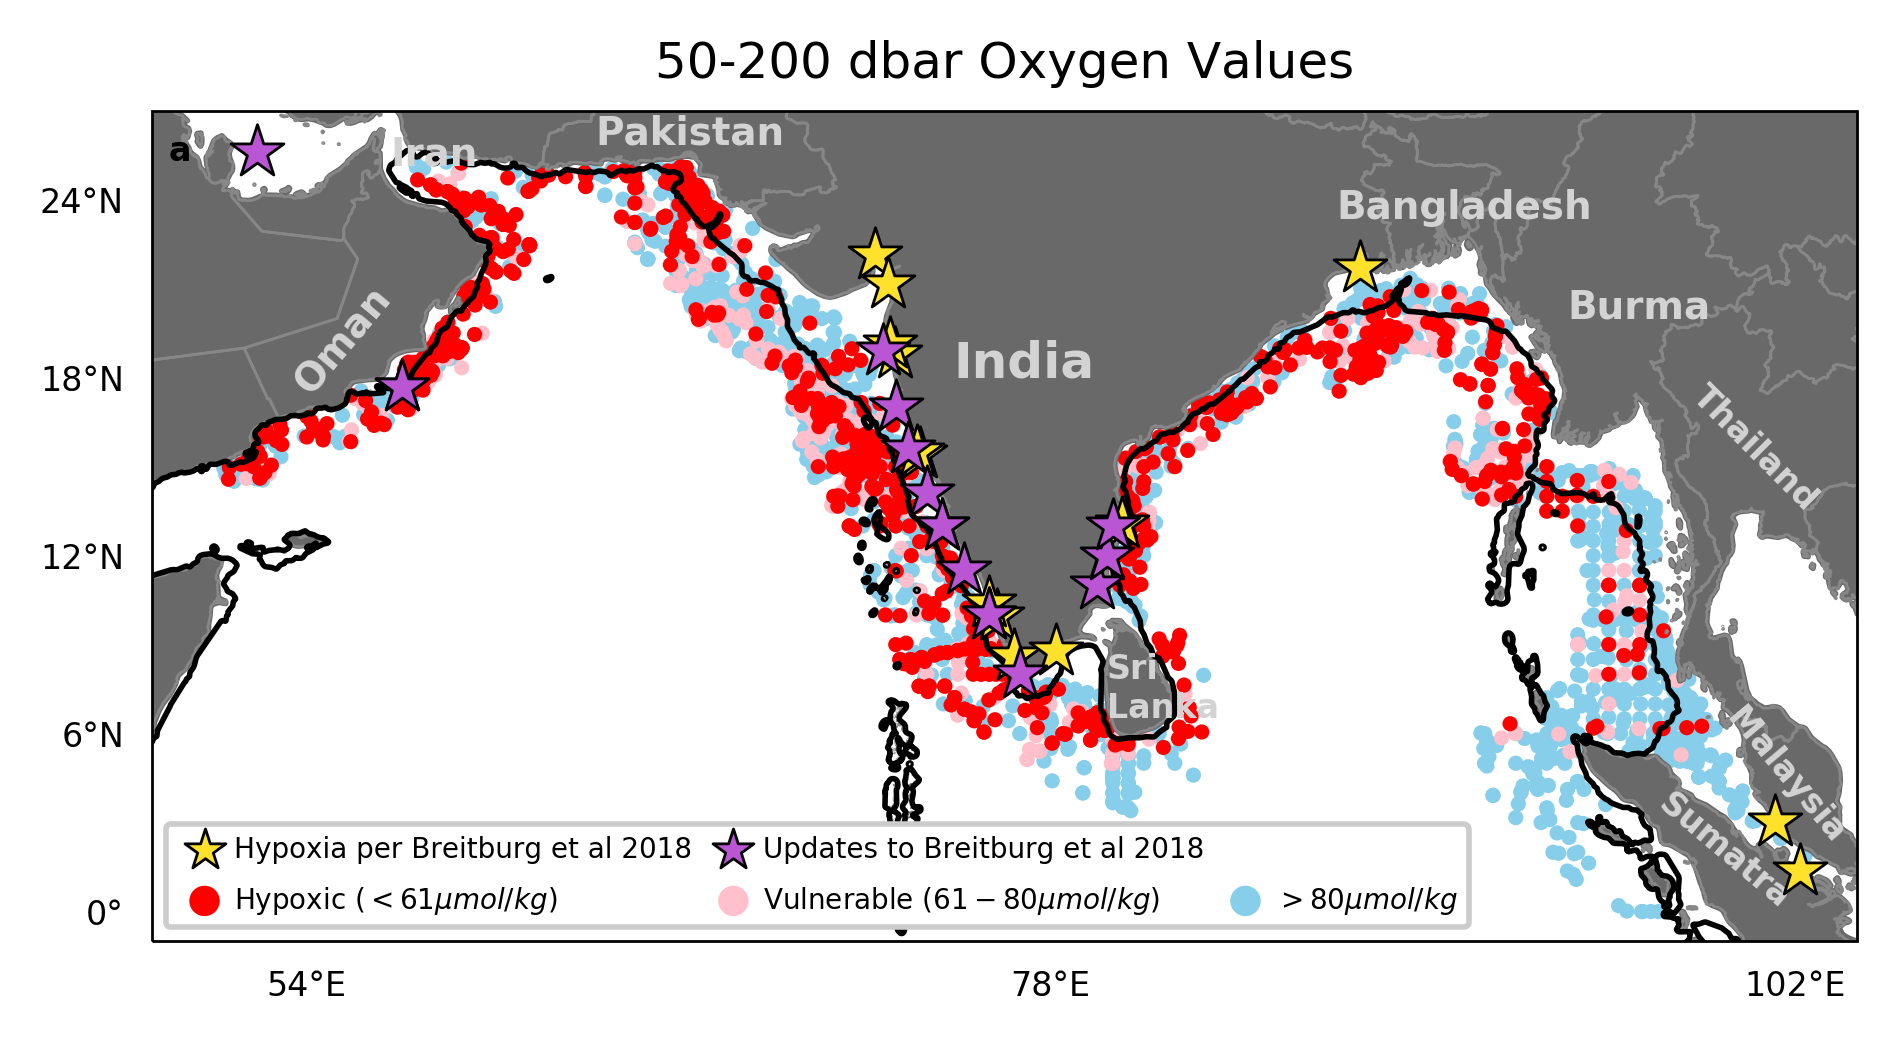

In [16]:
# # Plotting Full Indian Ocean

params = {'legend.fontsize': 5,
         'axes.labelsize': 6,
         'axes.titlesize': 9,
         'xtick.labelsize':6,
         'ytick.labelsize':6}

pylab.rcParams.update(params)
cmap = cmocean.cm.thermal_r

# limits 
cbounds = [49,104,-1,27]
cmin = 20
cmax = 160
sz = 30
# clrs = ['navy','limegreen','deeppink','purple']
clrs = ['crimson','navy','purple','darkgreen']
hyp_clr = '#FEE12B'
sla_clr = '#FEE12B'
lfz = 6
fig = plt.figure(figsize=(5.5,2.75),dpi=400)

#############################################################
#----------------- Oxygen---------------------#
#############################################################
ax = fig.add_subplot(111,projection= ccrs.PlateCarree())
# add_bathy(ax,cbounds)

# wAS
ind = ~np.isnan(ds_WOD.doxy_wAS_50_200)
doxy = ds_WOD.doxy_wAS_50_200[ind]
lon = ds_WOD.lon_wAS[ind]
lat = ds_WOD.lat_wAS[ind]

print('Length Oxygen wAS: ', len(doxy))
print('Min Time wAS: ', np.array(np.min(ds_WOD.time_wAS[ind])))
print('Max Time wAS: ', np.array(np.max(ds_WOD.time_wAS[ind])))

ind = doxy>=80
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c='skyblue',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())

ind = (doxy>=61) & (doxy<80)
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c='pink',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())


ind = doxy<61
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c='r',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())



# eAS
ind = ~np.isnan(ds_WOD.doxy_eAS_50_200)
doxy = ds_WOD.doxy_eAS_50_200[ind]
lon = ds_WOD.lon_eAS[ind]
lat = ds_WOD.lat_eAS[ind]

print('Length Oxygen eAS: ', len(doxy))
print('Min Time eAS: ', np.array(np.min(ds_WOD.time_eAS[ind])))
print('Max Time eAS: ', np.array(np.max(ds_WOD.time_eAS[ind])))

ind = doxy>=80
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c='skyblue',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())

ind = (doxy>=61) & (doxy<80)
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c='pink',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())


ind = doxy<61
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c='r',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())


# wBoB
ind = ~np.isnan(ds_WOD.doxy_wBoB_50_200)
doxy = ds_WOD.doxy_wBoB_50_200[ind]
lon = ds_WOD.lon_wBoB[ind]
lat = ds_WOD.lat_wBoB[ind]

print('Length Oxygen wBoB: ', len(doxy))
print('Min Time wBoB: ', np.array(np.min(ds_WOD.time_wBoB[ind])))
print('Max Time wBoB: ', np.array(np.max(ds_WOD.time_wBoB[ind])))

ind = doxy>=80
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c='skyblue',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())

ind = (doxy>=61) & (doxy<80)
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c='pink',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())


ind = doxy<61
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c='r',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())


# eBoB
ind = ~np.isnan(ds_WOD.doxy_eBoB_50_200)
doxy = ds_WOD.doxy_eBoB_50_200[ind]
lon = ds_WOD.lon_eBoB[ind]
lat = ds_WOD.lat_eBoB[ind]

print('Length Oxygen eBoB: ', len(doxy))
print('Min Time eBoB: ', np.array(np.min(ds_WOD.time_eBoB[ind])))
print('Max Time eBoB: ', np.array(np.max(ds_WOD.time_eBoB[ind])))

ind = doxy>=80
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c='skyblue',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())

ind = (doxy>=61) & (doxy<80)
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c='pink',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())


ind = doxy<61
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c='r',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())


####### Hypoxia ##############################################

newlat = [25.6,17.69,17.69,13,10,18.9,17,15.6,14.1,13,11.5,10,8,11,12,13]
newlon = [52.4,57.08,57.08,74.5,76,72.6,73,73.4,74,74.5,75.2,76,77,79.5,79.8,80]

ind = ds_HE.etype == 1
ax.scatter(ds_HE.lon[ind],ds_HE.lat[ind],s=100,marker = '*',c=hyp_clr,
           edgecolor = 'k',transform=ccrs.PlateCarree(), zorder = 4,linewidth=0.5)

ax.scatter(newlon,newlat,s=100,marker = '*',c='mediumorchid',
           edgecolor = 'k',transform=ccrs.PlateCarree(), zorder = 4,linewidth=0.5)
 


# land
g = add_land(ax, bounds = cbounds,countries = True, rivers = False)
# g.xlocator = mticker.FixedLocator(np.arange(60,110,10))
g.xlabel_style = {'size': 6}
g.ylabel_style = {'size': 6}
g.xlocator = mticker.FixedLocator([54,78,102])
add_letter(ax, 'a', x = 0.01,y=0.94, fontsize = lfz, color = 'k')
# bathy contour ##############################################
add_single_bathy_cline(ax,200,linewidth = 1)
add_box(ax,[],clrs)

ax.set_title('50-200 dbar Oxygen Values')

# ####### Countries ##############################################
clr = 'lightgray'
add_text(ax, 'India', x = 0.47,y=0.68, fontsize = 9, color = clr, weight = 'bold')
add_text(ax, 'Bangladesh', x = 0.695,y=0.87, fontsize = 7, color = clr, weight = 'bold')
add_text(ax, 'Pakistan', x = 0.26,y=0.96, fontsize = 7, color = clr, weight = 'bold')
add_text(ax, 'Iran', x = 0.14,y=0.935, fontsize = 7, color = clr, weight = 'bold')
add_text(ax, 'Oman', x = 0.08,y=0.66, fontsize = 7, color = clr, rotation = 50, weight = 'bold')
add_text(ax, 'Burma', x = 0.83,y=0.75, fontsize = 7, color = clr, rotation = 0, weight = 'bold')
add_text(ax, 'Thailand', x = 0.9,y=0.52, fontsize = 6, color = clr, rotation = -45, weight = 'bold')
add_text(ax, 'Malaysia', x = .92,y=0.12, fontsize = 6, color = clr, rotation = -50, weight = 'bold')
add_text(ax, 'Sumatra', x = 0.88,y=0.04, fontsize = 6, color = clr, rotation = -40, weight = 'bold')
add_text(ax, 'Sri\nLanka', x = 0.56,y=0.27, fontsize = 6, color = clr, weight = 'bold')

ax.scatter(np.nan,np.nan,s=15,marker = '*',c='#FEE12B',
                       edgecolor = 'k', label = 'Hypoxia per Breitburg et al 2018',linewidth=0.5)

ax.scatter(np.nan,np.nan,s=sz,marker = '.',c='r',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none', label = 'Hypoxic ($<61 \mu mol/kg$)')

ax.scatter(np.nan,np.nan,s=15,marker = '*',c='mediumorchid',
                       edgecolor = 'k', label = 'Updates to Breitburg et al 2018',linewidth=0.5)

ax.scatter(np.nan,np.nan,s=sz,marker = '.',c='pink',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none', label = 'Vulnerable ($61-80 \mu mol/kg$)')
ax.scatter(np.nan,np.nan,s=sz,marker = '.',c='none',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none', label = ' ')

ax.scatter(np.nan,np.nan,s=sz,marker = '.',c='skyblue',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none', label = '$>80 \mu mol/kg$')


l = ax.legend(loc='lower left',
              markerscale = 2,ncol = 3, columnspacing = 0.5,
              facecolor = 'w',framealpha=1,handletextpad=0.05, 
              labelspacing = 0.75);

plt.savefig(figpath + 'domain_O2_and_hypoxia.pdf', format='pdf', dpi = 400)

Length Oxygen wAS:  526
Min Time wAS:  1960-11-04T00:00:00.000000000
Max Time wAS:  2013-07-05T00:00:00.000000000
Length Oxygen eAS:  1774
Min Time eAS:  1948-03-14T00:00:00.000000000
Max Time eAS:  2020-05-24T00:00:00.000000000
Length Oxygen wBoB:  258
Min Time wBoB:  1961-01-30T00:00:00.000000000
Max Time wBoB:  2018-07-24T00:00:00.000000000
Length Oxygen eBoB:  959
Min Time eBoB:  1957-05-13T00:00:00.000000000
Max Time eBoB:  2018-07-10T00:00:00.000000000


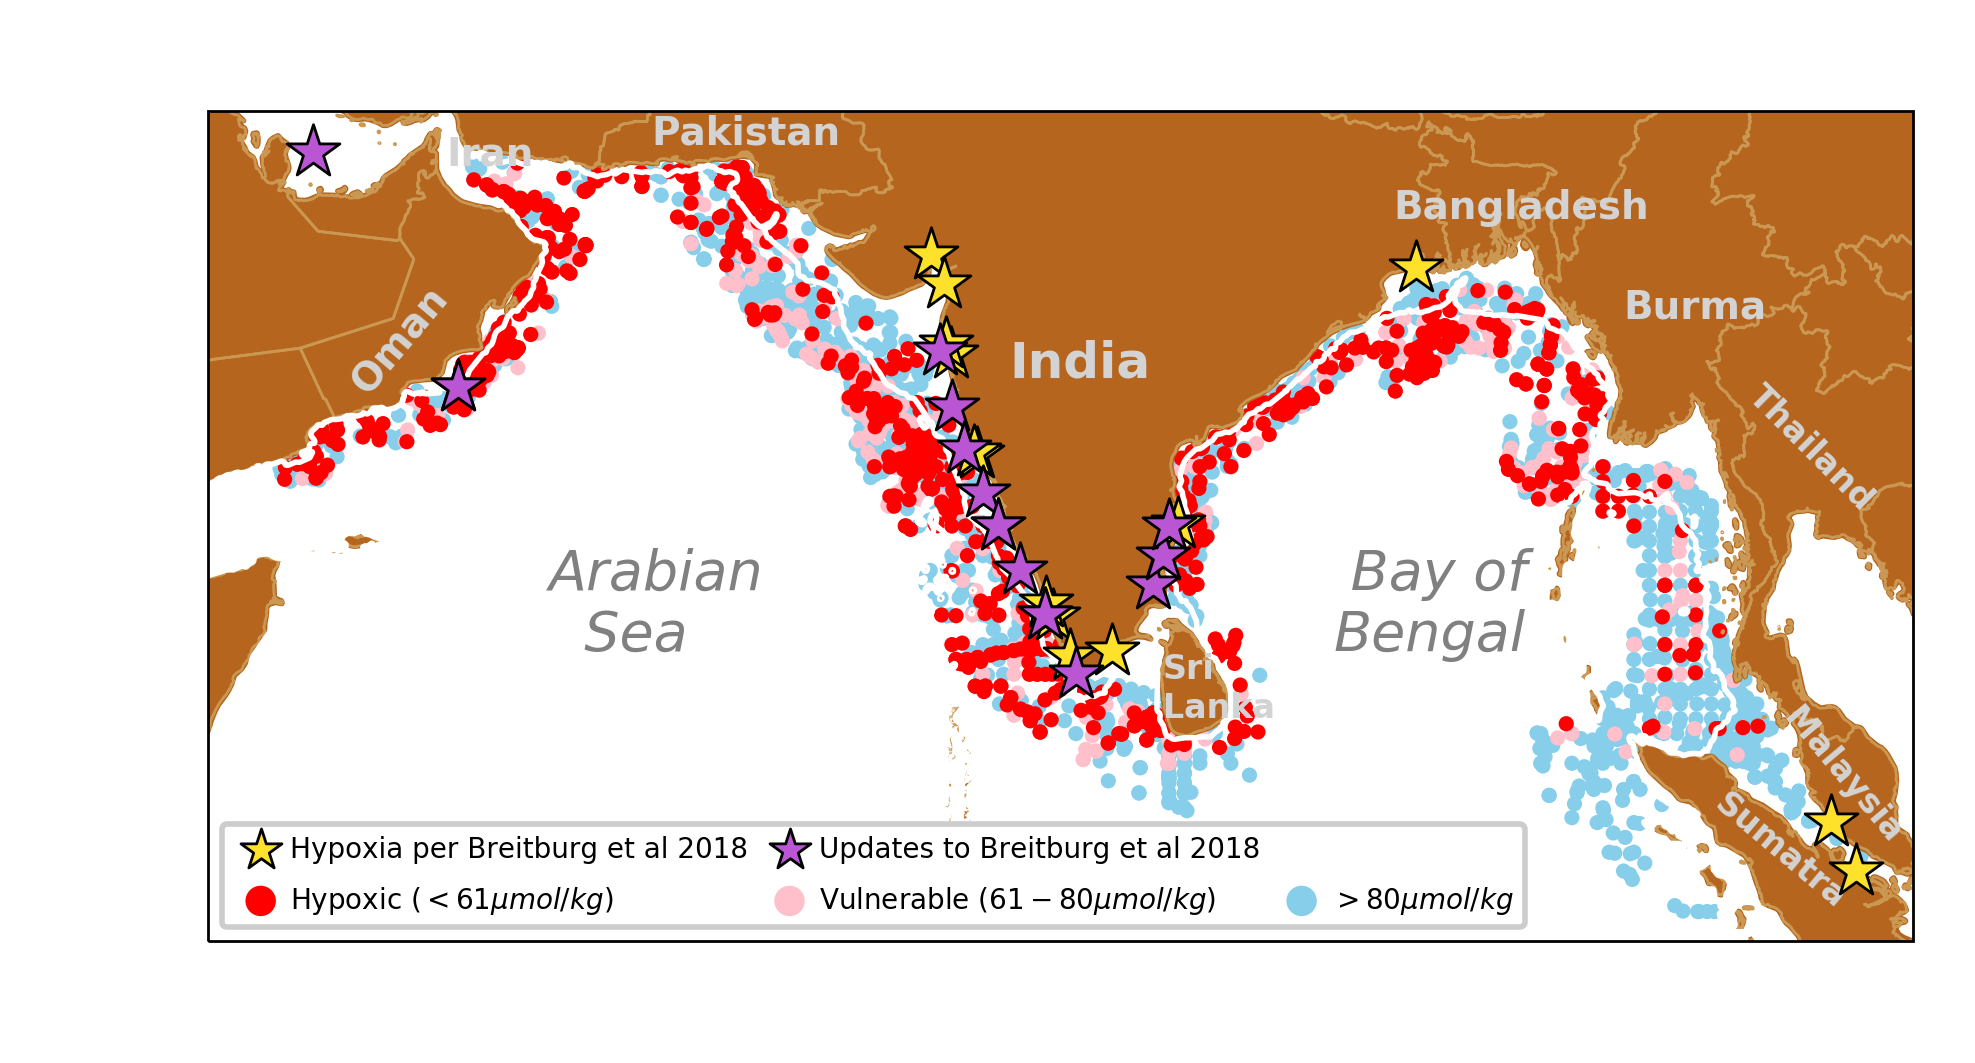

In [27]:
# # Plotting Full Indian Ocean

params = {'legend.fontsize': 5,
         'axes.labelsize': 6,
         'axes.titlesize': 9,
         'xtick.labelsize':6,
         'ytick.labelsize':6}

pylab.rcParams.update(params)
cmap = cmocean.cm.thermal_r

# limits 
cbounds = [49,104,-1,27]
cmin = 20
cmax = 160
sz = 30
# clrs = ['navy','limegreen','deeppink','purple']
clrs = ['crimson','navy','purple','darkgreen']
hyp_clr = '#FEE12B'
sla_clr = '#FEE12B'
lfz = 6
fig = plt.figure(figsize=(5.5,2.75),dpi=400)

#############################################################
#----------------- Oxygen---------------------#
#############################################################
ax = fig.add_subplot(111,projection= ccrs.PlateCarree())
# add_bathy(ax,cbounds)

# wAS
ind = ~np.isnan(ds_WOD.doxy_wAS_50_200)
doxy = ds_WOD.doxy_wAS_50_200[ind]
lon = ds_WOD.lon_wAS[ind]
lat = ds_WOD.lat_wAS[ind]

print('Length Oxygen wAS: ', len(doxy))
print('Min Time wAS: ', np.array(np.min(ds_WOD.time_wAS[ind])))
print('Max Time wAS: ', np.array(np.max(ds_WOD.time_wAS[ind])))

ind = doxy>=80
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c='skyblue',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())

ind = (doxy>=61) & (doxy<80)
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c='pink',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())


ind = doxy<61
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c='r',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())



# eAS
ind = ~np.isnan(ds_WOD.doxy_eAS_50_200)
doxy = ds_WOD.doxy_eAS_50_200[ind]
lon = ds_WOD.lon_eAS[ind]
lat = ds_WOD.lat_eAS[ind]

print('Length Oxygen eAS: ', len(doxy))
print('Min Time eAS: ', np.array(np.min(ds_WOD.time_eAS[ind])))
print('Max Time eAS: ', np.array(np.max(ds_WOD.time_eAS[ind])))

ind = doxy>=80
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c='skyblue',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())

ind = (doxy>=61) & (doxy<80)
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c='pink',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())


ind = doxy<61
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c='r',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())


# wBoB
ind = ~np.isnan(ds_WOD.doxy_wBoB_50_200)
doxy = ds_WOD.doxy_wBoB_50_200[ind]
lon = ds_WOD.lon_wBoB[ind]
lat = ds_WOD.lat_wBoB[ind]

print('Length Oxygen wBoB: ', len(doxy))
print('Min Time wBoB: ', np.array(np.min(ds_WOD.time_wBoB[ind])))
print('Max Time wBoB: ', np.array(np.max(ds_WOD.time_wBoB[ind])))

ind = doxy>=80
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c='skyblue',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())

ind = (doxy>=61) & (doxy<80)
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c='pink',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())


ind = doxy<61
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c='r',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())


# eBoB
ind = ~np.isnan(ds_WOD.doxy_eBoB_50_200)
doxy = ds_WOD.doxy_eBoB_50_200[ind]
lon = ds_WOD.lon_eBoB[ind]
lat = ds_WOD.lat_eBoB[ind]

print('Length Oxygen eBoB: ', len(doxy))
print('Min Time eBoB: ', np.array(np.min(ds_WOD.time_eBoB[ind])))
print('Max Time eBoB: ', np.array(np.max(ds_WOD.time_eBoB[ind])))

ind = doxy>=80
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c='skyblue',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())

ind = (doxy>=61) & (doxy<80)
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c='pink',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())


ind = doxy<61
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c='r',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none',transform=ccrs.PlateCarree())


####### Hypoxia ##############################################

newlat = [25.6,17.69,17.69,13,10,18.9,17,15.6,14.1,13,11.5,10,8,11,12,13]
newlon = [52.4,57.08,57.08,74.5,76,72.6,73,73.4,74,74.5,75.2,76,77,79.5,79.8,80]

ind = ds_HE.etype == 1
ax.scatter(ds_HE.lon[ind],ds_HE.lat[ind],s=100,marker = '*',c=hyp_clr,
           edgecolor = 'k',transform=ccrs.PlateCarree(), zorder = 4,linewidth=0.5)

ax.scatter(newlon,newlat,s=100,marker = '*',c='mediumorchid',
           edgecolor = 'k',transform=ccrs.PlateCarree(), zorder = 4,linewidth=0.5)
 


# land
g = add_land(ax, bounds = cbounds,countries = True, rivers = False,lcolor = '#b5651d',ccolor = '#ca9852')
# g.xlocator = mticker.FixedLocator(np.arange(60,110,10))
g.xlabel_style = {'size': 6}
g.ylabel_style = {'size': 6}
g.xlocator = mticker.FixedLocator([54,78,102])
# add_letter(ax, 'a', x = 0.01,y=0.94, fontsize = lfz, color = 'k')
g.xlabel_style = {'color': 'w'}
g.ylabel_style = {'color': 'w'}
# bathy contour ##############################################
add_single_bathy_cline(ax,200,linewidth = 1, color = 'w')
add_box(ax,[],clrs)

ax.set_title('World Ocean Database 50-200 dbar Oxygen Values', color = 'w')



# ####### Countries ##############################################
clr = 'lightgray'
add_text(ax, 'India', x = 0.47,y=0.68, fontsize = 9, color = clr, weight = 'bold')
add_text(ax, 'Bangladesh', x = 0.695,y=0.87, fontsize = 7, color = clr, weight = 'bold')
add_text(ax, 'Pakistan', x = 0.26,y=0.96, fontsize = 7, color = clr, weight = 'bold')
add_text(ax, 'Iran', x = 0.14,y=0.935, fontsize = 7, color = clr, weight = 'bold')
add_text(ax, 'Oman', x = 0.08,y=0.66, fontsize = 7, color = clr, rotation = 50, weight = 'bold')
add_text(ax, 'Burma', x = 0.83,y=0.75, fontsize = 7, color = clr, rotation = 0, weight = 'bold')
add_text(ax, 'Thailand', x = 0.9,y=0.52, fontsize = 6, color = clr, rotation = -45, weight = 'bold')
add_text(ax, 'Malaysia', x = .92,y=0.12, fontsize = 6, color = clr, rotation = -50, weight = 'bold')
add_text(ax, 'Sumatra', x = 0.88,y=0.04, fontsize = 6, color = clr, rotation = -40, weight = 'bold')
add_text(ax, 'Sri\nLanka', x = 0.56,y=0.27, fontsize = 6, color = clr, weight = 'bold')

# Seas
add_text(ax, ' Bay of \nBengal', x = 0.66,y=0.35, fontsize = 10, color = 'gray', style='italic')
add_text(ax, 'Arabian\n  Sea', x = 0.2,y=0.35, fontsize = 10, color = 'gray', style='italic')


ax.scatter(np.nan,np.nan,s=15,marker = '*',c='#FEE12B',
                       edgecolor = 'k', label = 'Hypoxia per Breitburg et al 2018',linewidth=0.5)

ax.scatter(np.nan,np.nan,s=sz,marker = '.',c='r',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none', label = 'Hypoxic ($<61 \mu mol/kg$)')

ax.scatter(np.nan,np.nan,s=15,marker = '*',c='mediumorchid',
                       edgecolor = 'k', label = 'Updates to Breitburg et al 2018',linewidth=0.5)

ax.scatter(np.nan,np.nan,s=sz,marker = '.',c='pink',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none', label = 'Vulnerable ($61-80 \mu mol/kg$)')
ax.scatter(np.nan,np.nan,s=sz,marker = '.',c='none',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none', label = ' ')

ax.scatter(np.nan,np.nan,s=sz,marker = '.',c='skyblue',cmap=cmap,vmin=cmin,vmax=cmax,
                       edgecolor = 'none', label = '$>80 \mu mol/kg$')


l = ax.legend(loc='lower left',
              markerscale = 2,ncol = 3, columnspacing = 0.5,
              facecolor = 'w',framealpha=1,handletextpad=0.05, 
              labelspacing = 0.75);

plt.savefig(figpath + 'domain_O2_and_hypoxia.png', format='png', dpi = 400)

In [17]:
# # # Plotting Full Indian Ocean

# params = {'legend.fontsize': 6,
#          'axes.labelsize': 6,
#          'axes.titlesize': 9,
#          'xtick.labelsize':6,
#          'ytick.labelsize':6}

# pylab.rcParams.update(params)
# cmap = cmocean.cm.thermal_r

# # limits 
# cbounds = [49,104,-1,27]
# cmin = 20
# cmax = 160
# sz = 5
# # clrs = ['navy','limegreen','deeppink','purple']
# clrs = ['crimson','navy','purple','darkgreen']
# hyp_clr = '#FEE12B'
# sla_clr = '#FEE12B'
# lfz = 6
# fig = plt.figure(figsize=(17.8 / 2.54,6),dpi=400)

# #############################################################
# #----------------- Temperature ---------------------#
# #############################################################
# ax = fig.add_subplot(111,projection= ccrs.PlateCarree())
# plt.subplots_adjust(wspace = 0.15, bottom = 0.3)
# # add_bathy(ax,cbounds)

# # wAS
# ind = ~np.isnan(ds_WOD.temp_wAS_50_200)
# p = ax.scatter(ds_WOD.lon_wAS[ind],ds_WOD.lat_wAS[ind],s=sz,marker = '.',c=clrs[0],cmap=cmap,vmin=cmin,vmax=cmax,
#                        edgecolor = 'none',transform=ccrs.PlateCarree(), label = 'WAS')
# print('Length Temperature wAS: ', len(ds_WOD.lon_wAS[ind]))
# print('Min Time wAS: ', np.array(np.min(ds_WOD.time_wAS[ind])))
# print('Max Time wAS: ', np.array(np.max(ds_WOD.time_wAS[ind])))

# # eAS
# ind = ~np.isnan(ds_WOD.temp_eAS_50_200)
# p = ax.scatter(ds_WOD.lon_eAS[ind],ds_WOD.lat_eAS[ind],s=sz,marker = '.',c=clrs[1],cmap=cmap,vmin=cmin,vmax=cmax,
#                        edgecolor = 'none',transform=ccrs.PlateCarree(), label = 'EAS')
# print('Length Temperature eAS: ', len(ds_WOD.lon_eAS[ind]))
# print('Min Time eAS: ', np.array(np.min(ds_WOD.time_eAS[ind])))
# print('Max Time eAS: ', np.array(np.max(ds_WOD.time_eAS[ind])))

# # wBoB
# ind = ~np.isnan(ds_WOD.temp_wBoB_50_200)
# p = ax.scatter(ds_WOD.lon_wBoB[ind],ds_WOD.lat_wBoB[ind],s=sz,marker = '.',c=clrs[2],cmap=cmap,vmin=cmin,vmax=cmax,
#                        edgecolor = 'none',transform=ccrs.PlateCarree(), label = 'WBoB')
# print('Length Temperature wBoB: ', len(ds_WOD.lon_wBoB[ind]))
# print('Min Time wBoB: ', np.array(np.min(ds_WOD.time_wBoB[ind])))
# print('Max Time wBoB: ', np.array(np.max(ds_WOD.time_wBoB[ind])))

# # eBoB
# ind = ~np.isnan(ds_WOD.temp_eBoB_50_200)
# p = ax.scatter(ds_WOD.lon_eBoB[ind],ds_WOD.lat_eBoB[ind],s=sz,marker = '.',c=clrs[3],cmap=cmap,vmin=cmin,vmax=cmax,
#                        edgecolor = 'none',transform=ccrs.PlateCarree(), label = 'EBoB')
# print('Length Temperature eBoB: ', len(ds_WOD.lon_eBoB[ind]))
# print('Min Time eBoB: ', np.array(np.min(ds_WOD.time_eBoB[ind])))
# print('Max Time eBoB: ', np.array(np.max(ds_WOD.time_eBoB[ind])))

# # # # Hypoxic Events
# # ax.scatter(ds_HE.lon,ds_HE.lat,s=8,marker = '*',c=hyp_clr,
# #                        transform=ccrs.PlateCarree(), zorder = 4)

# ###### SLA ###################################################################

# # add coastal hovemuller white squares and to legend
# # p = ax.scatter(ds_CL.sta_lon,ds_CL.sta_lat,s=sz,marker = '.',c=sla_clr, 
# #                edgecolors=sla_clr,transform=ccrs.PlateCarree(), label = 'Coastal SLA Stations')
# # p = ax.scatter(ds_CL.sta_lon,ds_CL.sta_lat,s=7,marker = '.',c=sla_clr, 
# #                edgecolor = 'none',transform=ccrs.PlateCarree(), zorder = 3)
# # p = ax.scatter(ds_CL.sta_lon[ds_CL.loc_list],ds_CL.sta_lat[ds_CL.loc_list],s=25,
# #                edgecolor = 'none',marker = '.',c='w', edgecolors='k',transform=ccrs.PlateCarree(), zorder = 3)

# # land
# g = add_land(ax, bounds = cbounds,countries = True, rivers = True)
# # g.xlocator = mticker.FixedLocator(np.arange(60,110,10))
# g.xlabel_style = {'size': 6}
# g.ylabel_style = {'size': 6}
# g.xlocator = mticker.FixedLocator([54,78,102])
# add_letter(ax, 'a', x = 0.01,y=0.94, fontsize = lfz, color = 'k')
# # bathy contour ##############################################
# add_single_bathy_cline(ax,200,linewidth = 1)
# add_box(ax,[],clrs)

# ax.set_title('Temperature Profiles')


# # cbar = add_bathy_cbar(fig,ax, lmax = 6000,pos = [0.685, 0.15, 0.2, 0.02])
# # cbar.set_label(label = 'm below sea level', color = 'k', fontsize = 6)
# # cbar.ax.tick_params(axis='x', colors='k',labelsize=5)
